# Fit the basis elements to Martin Hairer regularity structures

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import integrate

In [13]:
data = np.load('../data_latent.npy')
print(data.shape)

nu_slice = 0

H = data[:,:,nu_slice,3::]
xx =  data[:,:,nu_slice,0]
tt =  data[:,:,nu_slice,1]
nunu =  data[:,:,nu_slice,2]

print(nunu)

noise = np.loadtxt('noise.txt')

(101, 101, 5, 13)
[[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


In [14]:
%matplotlib widget
from ipywidgets import interact, IntSlider

# Function to update the plot based on the slider value
def update_plot(dim):
    fig = plt.figure()
    global ax  # Declare ax as global to avoid redefinition in subsequent calls
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(tt, xx, H[:, :, dim], cmap='rainbow')
    ax1.set_xlabel('tt')
    ax1.set_ylabel('xx')
    ax1.set_zlabel('H')
    plt.show()

# Create a slider for the third dimension
slider = IntSlider(value=0, min=0, max=H.shape[2]-1, step=1, description='Dimension:')
interact(update_plot, dim=slider)

interactive(children=(IntSlider(value=0, description='Dimension:', max=9), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(dim)>

In [15]:
def heat_kernel(x,y,t):
    return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
def init_sines(x):
    return np.sin(x * np.pi / 5) + 0.2 * np.cos(x * np.pi / 5 * 1 / 2) + 2 * np.sin(x * np.pi / 5 * 2)
def init_sines(x):
    return 0.0

In [16]:
basis_elements = np.ones([101,101,9])

# 0: index for space
# 1: index for time

for i in range(tt.shape[0]):
    for j in range(tt.shape[1]):
        y = xx[i,::]
        if j >= 0:
            basis_elements[i,j,0] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*init_sines(y), y)  # This is c

for i in range(len(xx)):
    for j in range(len(tt)):
        y = xx[j,::]
        if j >= 0:
            basis_elements[i,j,1] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0], y)  # This is I[c]
            basis_elements[i,j,2] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::], y)  # This is I[noise]
            basis_elements[i,j,3] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y), y)  # This is I[Dx c]
            basis_elements[i,j,4] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::]*basis_elements[i,::,0], y)  # This is I[c xi]
            basis_elements[i,j,5] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::]*np.gradient(basis_elements[i,::,0], y), y)  # This is I[Dxc xi]
            basis_elements[i,j,6] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0]**2, y)  # This is I[c^2]
            basis_elements[i,j,7] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y)**2, y)  # This is I[Dxc ^2]
            basis_elements[i,j,8] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y)*basis_elements[i,::,0], y)  # This is I[c Dxc]


/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: invalid value encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))


In [17]:
basis_elements = np.ones([101,101,7])

for i in range(len(xx)):
    for j in range(len(tt)):
        y = xx[j,::]
        if j >= 0:
            basis_elements[i,j,0] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::], y)  # This is I[noise]
            basis_elements[i,j,1] =  integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y), y) # I[Dx I[noise]]
            basis_elements[i,j,2] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0], y) # I[I[noise]]
            basis_elements[i,j,3] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,1]), y) # I[Dx I[Dx I[noise]]]
            basis_elements[i,j,4] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,1], y) # I[I[Dx I[noise]]]
            basis_elements[i,j,5] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,2]), y) # I[Dx I[I[noise]]]
            basis_elements[i,j,6] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,2], y) # I[I[I[noise]]]

/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: invalid value encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1658024/545054164.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))


In [18]:
%matplotlib widget
import ipywidgets as widgets
from ipywidgets import interact

# Function to update the plot based on the slider value

def update_plot(dim):
    fig = plt.figure()
    ax2 = fig.add_subplot(111,projection = '3d')
    #ax.clear()
    print(basis_elements[:, 1::, dim])
    ax2.plot_surface(xx[::,1::], tt[::,1::], basis_elements[:, 1::, dim], cmap='rainbow')
    ax2.set_xlabel('x')
    ax2.set_ylabel('t')
    ax2.set_zlabel('Basis Element')
    #fig.savefig('Plots/KPZ_D1em1_sine_condition/reg_structure_'+str(dim)+'.pdf')
    plt.draw()
    plt.show()

# Create a slider for the third dimension
slider = widgets.IntSlider(value=4, min=0, max=basis_elements.shape[2]-1, step=1, description='Dimension:')
interact(update_plot, dim=slider)


interactive(children=(IntSlider(value=4, description='Dimension:', max=6), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(dim)>

In [19]:
print(np.reshape(basis_elements,(-1,7)).shape)

(10201, 7)


0
[ 0.51548654  0.20079398 -1.66163608 -1.02099119 -0.49237428 -2.68286715
  1.65640798]
[0.01730873]
0.10536951562719563


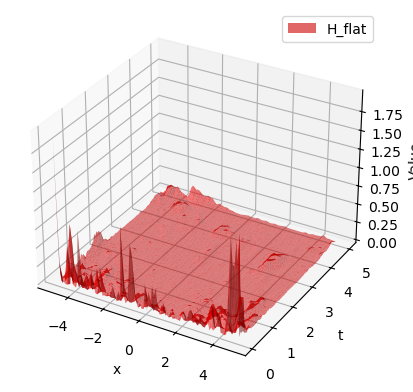

1
[ 0.1545988   0.43783086  0.01907066 -0.39625417 -0.86550448  0.6349452
  0.75891944]
[0.03330388]
0.1579743033686364


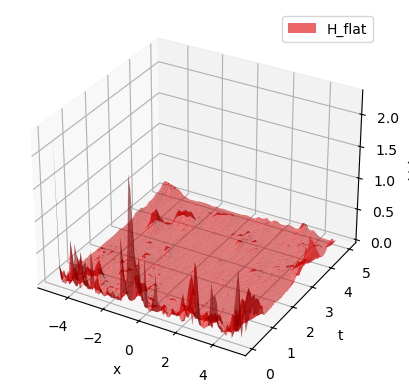

2
[ 0.69394104  0.7084654  -1.67284328 -0.87415817 -1.25328587 -2.72983446
  2.87938002]
[0.02585735]
0.08054861591373061


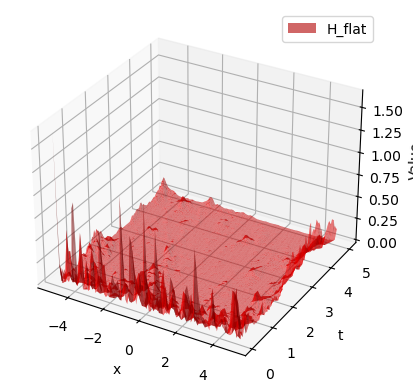

3
[-0.14734566  0.13808877  0.31742257 -0.13049592  0.06652147 -2.00577362
  0.00313072]
[0.01470884]
0.0710377032935831


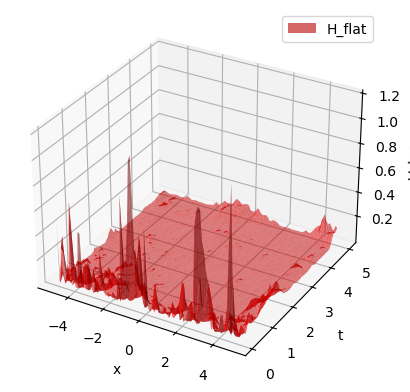

4
[ 0.26504111 -0.02095235 -1.03708977  0.42223653  0.03615212  0.87706517
  0.92180954]
[0.02963193]
0.11163204701069164


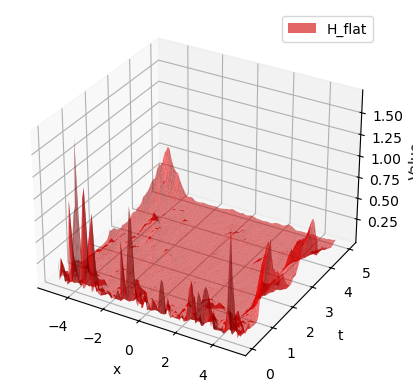

5
[-0.82406466 -0.00546821  1.74369549 -0.64823196 -0.1462033  -0.49746954
 -0.53372127]
[0.04178772]
0.1434687759821902


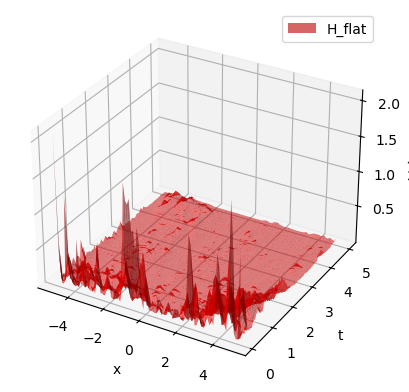

6
[-0.82726206  0.1027334   2.12596813 -0.55956883 -0.2459313  -0.9697354
 -1.319091  ]
[0.02790026]
0.17336868925938617


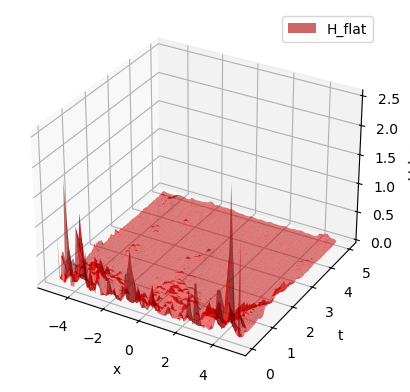

7
[ 0.4401908   0.23117168 -1.03545365 -0.76062357 -0.46472759 -0.64879162
  0.91364761]
[0.02042762]
0.1336540172030352


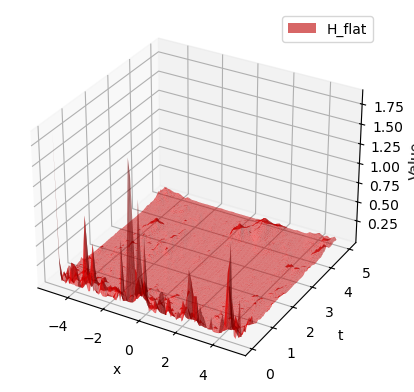

8
[ 0.07884736  0.14487017 -0.17216801 -0.15334216 -0.14131644 -1.01502148
  0.41416335]
[0.00055708]
0.011301724336238762


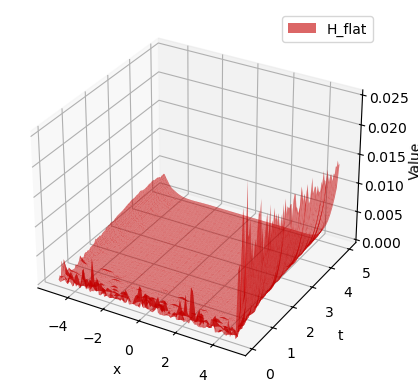

9
[-0.14747356 -0.279881    0.32002016  0.30002534  0.27209859  1.98590987
 -0.79232953]
[0.00207398]
0.0353586325339419


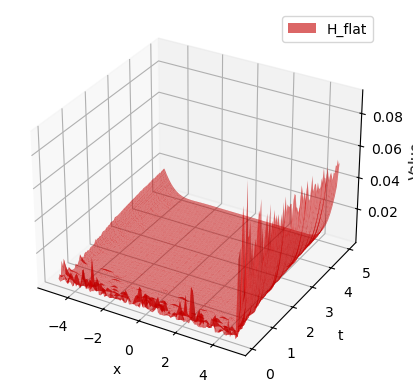

In [25]:
# Compute the coefficients of the fit
#%matplotlib inline
import numpy as np
coefficients = []
rel_residuals = []
for i in range(len(H[0,0,::])):
    print(i)
    # Flatten the grid and f for vectorized linear algebra
    t_flat = tt[1::,::].ravel()  # shape (10201,)
    x_flat = xx[1::,::].ravel()
    H_flat = H[1::,::,i].ravel()

    # Construct design matrix A where A[:, i] = phi_i(x, y)
    A = np.reshape(basis_elements[1::,::,::],(-1,7))  # shape (10201, n_basis)

    # Solve least squares: A @ c ≈ f_flat
    c, residuals, rank, s = np.linalg.lstsq(A, H_flat, rcond=None)
    print(c)
    print(residuals/t_flat.shape)
    # Now you can reconstruct the fit
    f_fit_flat = A @ c
    f_fit = f_fit_flat.reshape(xx[1::,::].shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print(np.mean(abs(f_fit_flat-H_flat)/abs(H_flat+1)))
    rel_residuals.append(np.mean(abs(f_fit_flat-H_flat)/abs(H_flat+1)))
    #ax.plot_trisurf(x_flat, t_flat, f_fit_flat, color='blue', alpha=0.6, label='f_fit')
    #ax.plot_trisurf(x_flat, t_flat, H_flat, color='red', alpha=0.6, label='H_flat')
    ax.plot_trisurf(x_flat, t_flat, (f_fit_flat-H_flat)**2, color='red', alpha=0.6, label='H_flat')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('Value')
    plt.legend()
    #fig.savefig('Plots/KPZ_D1em1_sine_condition/fit_residual_'+str(i)+'.pdf')
    plt.show()
    coefficients.append(c)


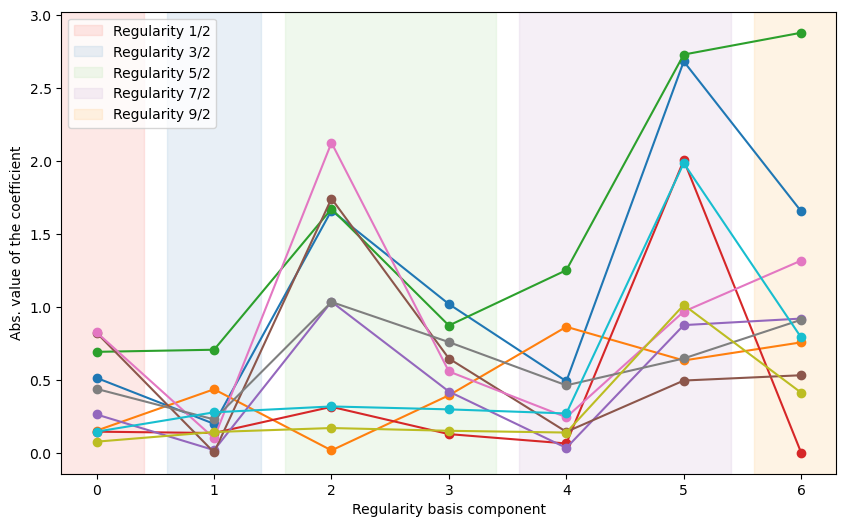

In [28]:
%matplotlib inline
from collections import defaultdict
from fractions import Fraction

# After the loop, plot all coefficient
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i in range(len(coefficients)):
    ax.plot(range(len(coefficients[0])), abs(coefficients[i]), marker='o')#, label=f'$H_{i}$')

# Draw vertical rectangles for regularity values
# Group indices by regularity value
regularity_values = [1/2, 3/2, 5/2, 5/2, 7/2, 7/2, 9/2]
reg_to_indices = defaultdict(list)
for idx, reg in enumerate(regularity_values):
    reg_to_indices[reg].append(idx)

colors = plt.cm.Pastel1.colors  # Use a colormap for distinct colors
for color_idx, (reg, indices) in enumerate(reg_to_indices.items()):
    # Find the min and max index for this regularity group
    min_idx = min(indices)
    max_idx = max(indices)
    # Draw a rectangle spanning all indices with the same regularity
    reg_frac = Fraction(reg).limit_denominator()
    rect = plt.Rectangle((min_idx-0.4, ax.get_ylim()[0]), 
                         max_idx-min_idx+0.8, 
                         ax.get_ylim()[1]-ax.get_ylim()[0],
                         color=colors[color_idx % len(colors)], 
                         alpha=0.3, 
                         label=f'Regularity {reg_frac}')
    ax.add_patch(rect)


ax.set_ylabel('Abs. value of the coefficient')
ax.set_xlabel('Regularity basis component')


ax.legend()
plt.savefig('Regularity_fit.pdf')
plt.show()


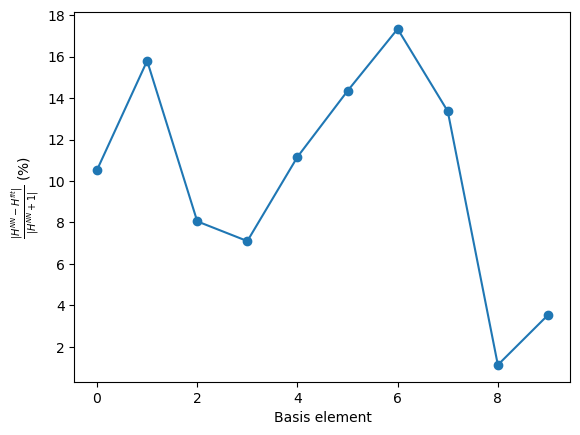

In [24]:
plt.plot(np.array(rel_residuals)*100,marker = 'o')
plt.xlabel('Basis element')
plt.ylabel('$\\frac{|H^{NN}-H^{fit}|}{|H^{NN}+1|}$ (%)')
plt.savefig('Relative_error_fit.pdf')
plt.show()